In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

<h3>Dữ Liệu</h3>

|Giờ Ngủ | Giờ Học | Điểm
| :-: | :-: | :-: |
|3|5|75|
|5|1|82|
|10|2|93|
|8|5|?| **

In [2]:

# X = (hours sleeping, hours studying), y = Score on test# X = ( 
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)
print(f"X: \n{X} \n y:\n{y}")
#Scale data
print(f"max X: {np.max(X)}")
X = X/np.max(X)
y= y/100
print(f"Scale data: \nX:\n {X} \ny:\n {y}")

X: 
[[ 3.  5.]
 [ 5.  1.]
 [10.  2.]] 
 y:
[[75.]
 [82.]
 [93.]]
max X: 10.0
Scale data: 
X:
 [[0.3 0.5]
 [0.5 0.1]
 [1.  0.2]] 
y:
 [[0.75]
 [0.82]
 [0.93]]


<img src ="img/neural_network_2.png">

<h5 align ="center"> Mạng nơ-ron</h5>

<img src="img/neuron_model.jpeg" />
<h6 align ="center">Cấu trúc một nơ-ron</h6>

<h3 align = 'center'> Variables </h3>

|ký tự Code  | Ký tự toán | Định nghĩa | Số chiều
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, mỗi dòng trong ma trận| (numExamples, inputLayerSize)|
|y |$$y$$|target data|(numExamples, outputLayerSize)|
|yHat |$$\widehat{y}$$|y predict|(numExamples, outputLayerSize)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, outputLayerSize) |
|J | $$J$$ | Cost | (1, outputLayerSize) |
<br>
numberExamples =3<br/>
inputLayerSize =2 <br/>
outPutLayerSize =1<br/>



<h3>FeedForward</h3>
$$
\begin{align*}
\begin{bmatrix}
3 & 5 \\
5 & 1 \\
10 & 2 \\
\end{bmatrix}
*
\begin{bmatrix}
w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)} \\
w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)} 
\end{bmatrix}
=
\begin{bmatrix}
3*w_{11}^{(1)} + 5*w_{21}^{(1)}  &  3*w_{12}^{(1)} + 5*w_{22}^{(1)} & 3*w_{13}^{(1)} + 5*w_{23}^{(1)} \\
5*w_{11}^{(1)} + 1*w_{21}^{(1)}  &  5*w_{12}^{(1)} + 1*w_{22}^{(1)} & 10*w_{13}^{(1)} + 10*w_{23}^{(1)} \\ 
10*w_{11}^{(1)} + 2*w_{21}^{1)}  &  10*w_{12}^{(1)} + 2*w_{22}^{(1)} & 2*w_{13}^{(1)} + 2*w_{23}^{(1)}
\end{bmatrix}
=
\begin{bmatrix}
z_{1}^{(2)}\\
z_{2}^{(2)}\\
z_{3}^{(2)}
\end{bmatrix}
\end{align*}
$$

Chuyển về vector chúng ta có dạng tổng quát như sau
$$
X* W^{T} = z^{(2)} \tag{1}
$$

Tiếp theo sẽ tính đầu ra thông qua hàm sigmoid    $f(z)=\frac {1}{1+e^{-z}}$
$
a^{(2)} = f(z^{(2)})  \tag{2}
$
<br>

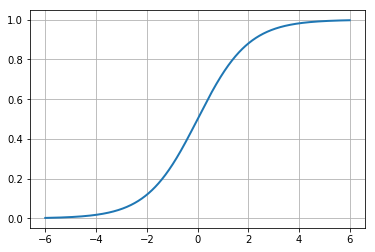

In [3]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))
testInput = np.arange(-6,6,0.01)
plt.plot(testInput, sigmoid(testInput), linewidth= 2)
plt.grid(1)
plt.show()

Coi $a^{(2)}$ tương tự như đầu vào ta sẽ tính được <br>
$
z^{(3)}= a^{(2)}* W^{(2)T}  \tag{3}
$
với  $ 
W^{(2)}
=
\begin{bmatrix}
w_{11}^{(2)}\\
w_{21}^{(2)}\\
w_{31}^{(2)}
\end{bmatrix} ^T
$
<br>
và 
<br>
$
a^{(3)}= \widehat{y} = f(z^{(3)})  \tag{4}
$

In [4]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

y predict:
[[0.42729918]
 [0.36206701]
 [0.41314187]]
y true:
[[0.75]
 [0.82]
 [0.93]]


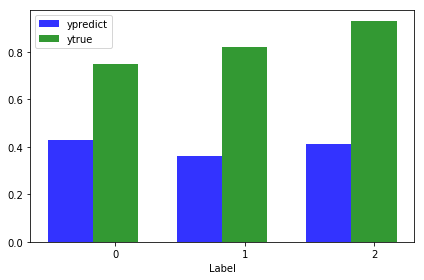

In [5]:
"""Test feedforward"""
np.random.seed(2)
NN = Neural_Network()
yHat = NN.forward(X)
print('y predict:')
print(yHat)
print('y true:')
print(y)


# plot 
# data to plot
n_groups = 3
yHat_plot = yHat.reshape(yHat.shape[0],)
y_plot = y.reshape(y.shape[0],)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, yHat_plot, bar_width,
                 alpha=opacity,
                 color='b',
                 label='ypredict')
 
rects2 = plt.bar(index + bar_width, y_plot, bar_width,
                 alpha=opacity,
                 color='g',
                 label='ytrue')
 
plt.xlabel('Label')
plt.xticks(index + bar_width, ('0', '1', '2'))
plt.legend()
 
plt.tight_layout()
plt.show()

<h1> Hàm Mất Mát (Cost Function) </h1>
- Giá trị mất mát (cost - kí hiệu là $J$) là sự chênh lệch giữa đầu ra dự đoán và đầu ra thực tế
- Sự chênh lệch giữa $\hat{y}$ và $y$ càng nhỏ => Sự dự đoán của chúng ta càng chính xác 
- Có nhiều cách tính hàm mất mát: sai số bình phương (mean square error - MSE), sau số tuyệt đối (mean absolute error - MAE), cross entropy (link tham khảo: https://keras.io/losses/#available-loss-functions) <br>

<h4>Chọn MSE là hàm mất mát</h4>

Đặt ${\displaystyle e_{i} = y_{i}-\hat {y}_{i}}$  ${\displaystyle J = \frac {1}{2}(e_{1}^2+e_{2}^2+e_{3}^2) = \sum_{i=1}^3 \frac {1}{2} e_{i}^2  = \sum_{i=1}^3 \frac {1}{2}(y_{i}-\widehat {y}_{i})^{2}  }\tag{5}$ <br>
<br>


<h4 align ='center' style ="color: red;">Huấn Luyện Mạng = Làm Giảm Giá Trị Mất Mất  </h4>

<h3>Tối ưu hàm mất mát: Gradient descent </h3>
<br><br>
Một số thông tin cần biết: <br>
- Giá trị của biến khiến **đạo hàm bằng 0 và lân cận** thì tại đó hàm đạt **giá trị cực tiểu (_local minimum_)** còn **giá trị nhỏ nhất** của hàm số là **_global minimum_**
- Đường tiếp tuyến với đồ thị hàm số đó tại 1 điểm bất kỳ có hệ số góc chính bằng đạo hàm của hàm số tại điểm đó. ($f'(x_{0})$)
- Định nghĩa đạo hàm: ${\displaystyle f'(x) = \underset{\Delta x \rightarrow 0}{\lim} \frac {\Delta f}{\Delta x}}$




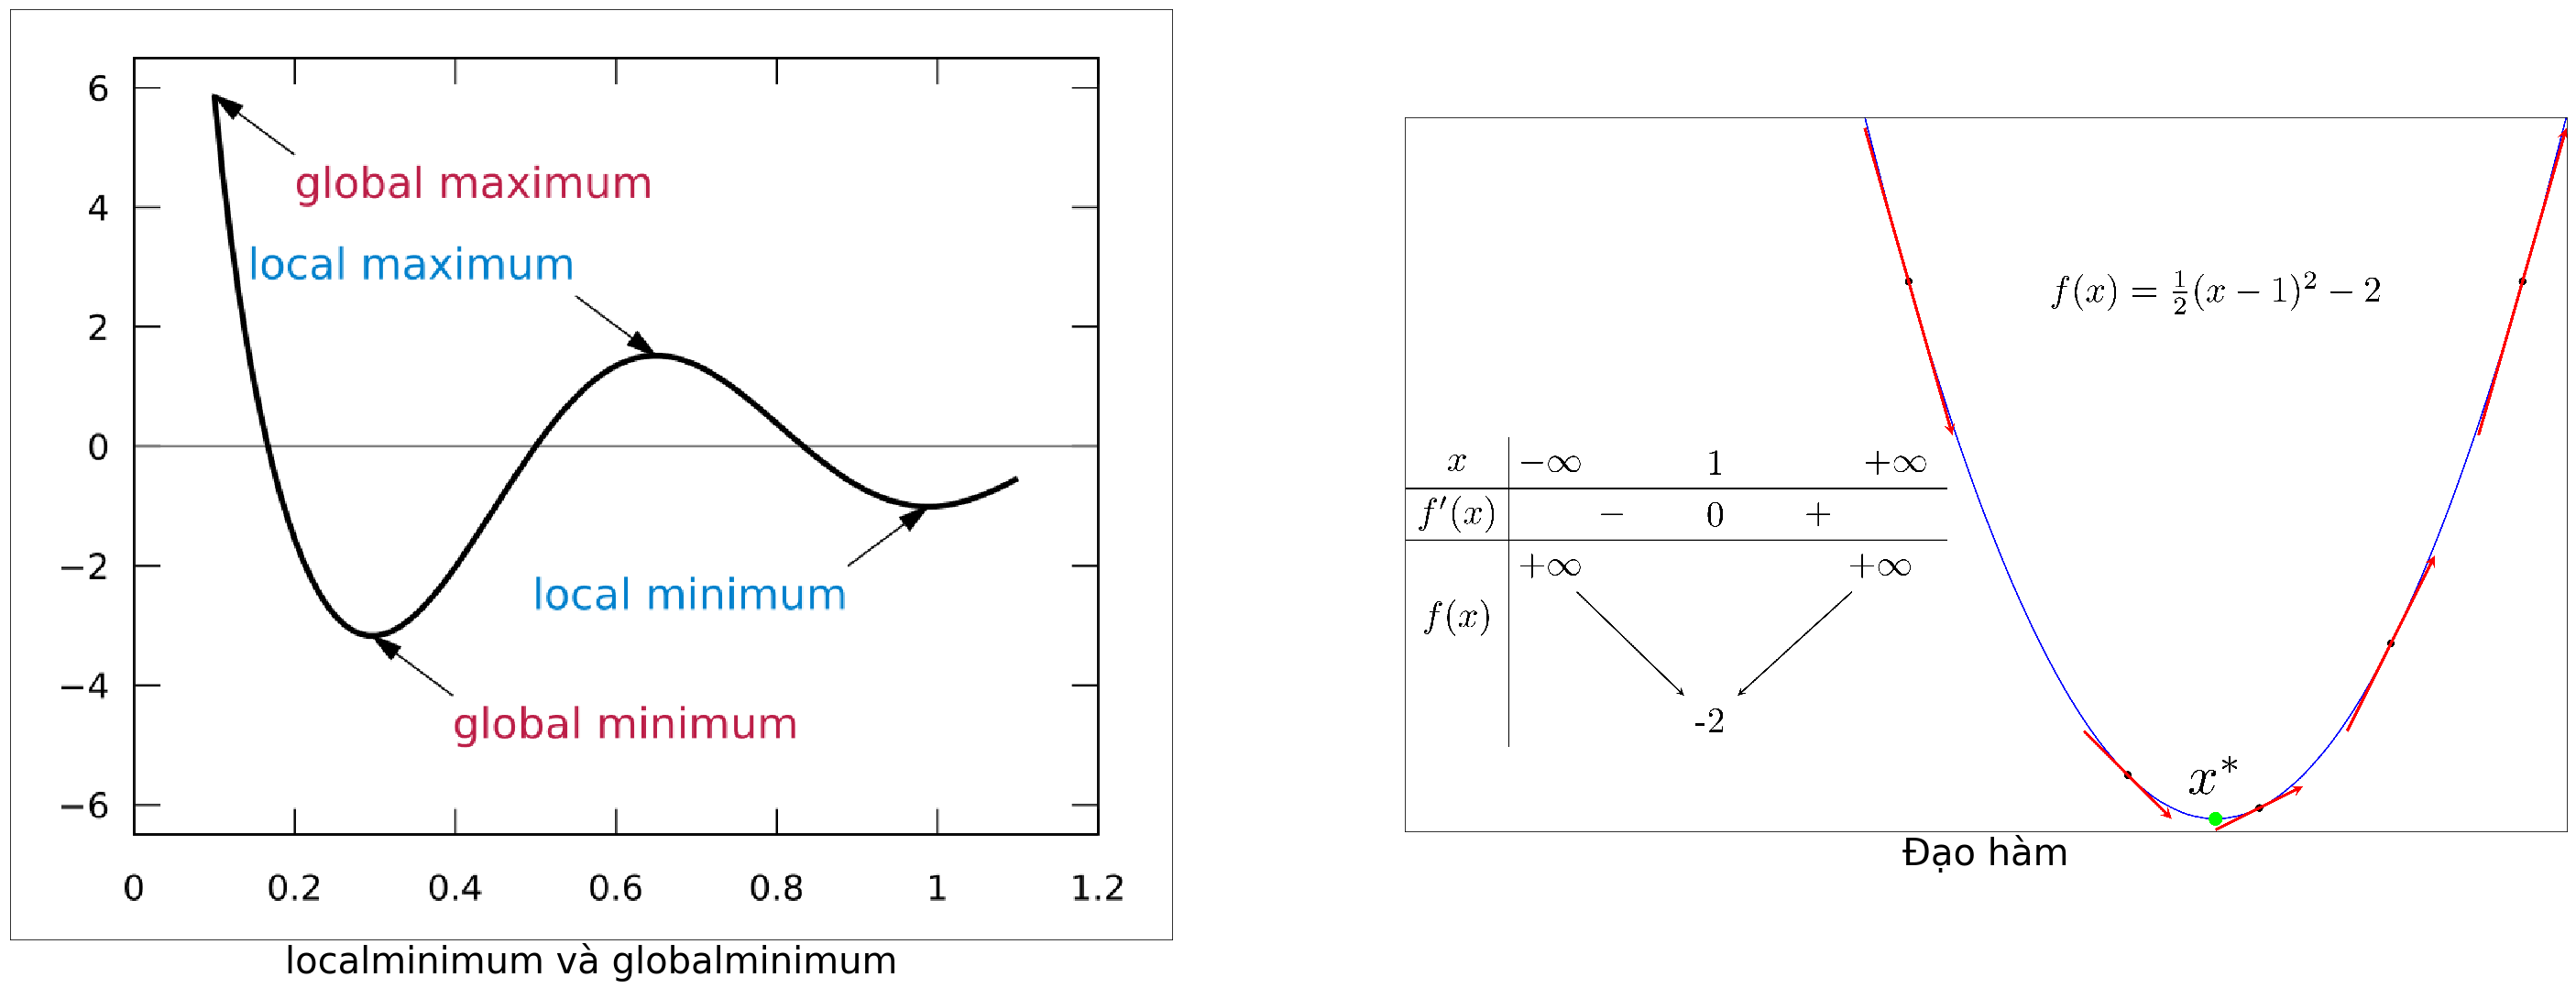

In [6]:
img_minimum = mpimg.imread(r"img/localminimum.png")
img_daoham = mpimg.imread(r"img/gradient_descent.png")

fig,axes = plt.subplots(1,2,figsize =(50,50))
axes[0].imshow(img_minimum)
axes[1].imshow(img_daoham)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_xlabel("localminimum và globalminimum",fontsize=40)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlabel("Đạo hàm",fontsize=40)
plt.show()

<br><br>
Giả sử ta xuất phát từ một điểm x_{t} nào đó và cần di chuyển đến vị trí $x^{*}$, dựa vào hình "Đạo hàm" ta có một số nhận xét:
- $x_{t}$ tiến đến gần $x^{*}$ thì luôn đi **ngược chiều so với đạo hàm**:$x_{t+1} = x_{t} + \Delta$<br>
Trong đó $\Delta$ là một đại lượng **_ngược dấu_** với đạo hàm $f'(x_{t})$<br>

- Ta thấy: $x_{t}$ càng xa $x^{*}$ thì $f'(x_{t})$ càng lớn hơn 0 (và ngược lại). Vì thế $\Delta$ tỉ lệ thuận với $-f'{x_{t}}$

=> Công thức cập nhật: $x_{t+1} = x_{t} + \eta (-f'(x_t)) = x_{t} -\eta f'(x_{t})$ <br>
Với $\eta$ được gọi là tốc độ học (learing rate)

<font color='red'>**Gradient Descent**</font> chính là việc từ một điểm nào đó ta tìm đến điểm có đạo hàm bằng 0 hoặc lân cận của nó thông qua nhiều vòng lặp

Ví dụ về chọn learing rate $\eta$
<table><tr><td><img src='img/lrsmall.gif'></td><td><img src='img/lrbig.gif'></td></tr></table>

<br>
Tổng kết lại xíu.<br>
Sau quá trình feedforward, chúng ta thu được như sau:
$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$
$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$
$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$
$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}\\
$$
<br>


Để tìm giá trị của $w$ sao cho $J$ là minimum, ta cần tính đạo hàm riêng của $J$ theo từng $w$
(Đoạn này hơi thiên về toán) <br>
Ví dụ:
$$
\begin{bmatrix}
w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)} \\
w_{21}^{(2)} & w_{22}^{(2)} & w_{23}^{(2)} 
\end{bmatrix}
=> \frac {\partial J}{\partial W^{(1)}} = 
\begin{bmatrix}
\frac{\partial J}{\partial w_{11}^{(1)}} & \frac{\partial J}{\partial w_{12}^{(1)}}&\frac{\partial J}{\partial w_{13}^{(1)}} \\
\frac{\partial J}{\partial w_{21}^{(1)}} & \frac{\partial J}{\partial w_{22}^{(1)}}&\frac{\partial J}{\partial w_{23}^{(1)}} \\
\end{bmatrix}
$$

**Gradient descent đối với 1 nơ-ron **
<img src ="img/backpropagation.png" style ="width:500px">

**Gradient descent cho bài toán của chúng ta**<br>
$$
\begin{align*}
\frac{\partial J}{\partial W^{(2)}} =& \frac{\partial \sum \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}\\
=&-(y-\hat{y}) \frac{\partial \hat{y}}{\partial W^{(2)}}\\
=&-(y-\hat{y})
    \frac{\partial \hat{y}}{\partial z^{(3)}}
    \frac{\partial z^{(3)}}{\partial W^{(2)}}\\
\end{align*}
$$

Đạo hàm đối với hàm sigmoid:
$$
f(z) = \frac{1}{1+e^{-z}}
$$
$$
f^\prime(z) = \frac{e^{-z}}{(1+e^{-z})^2}
$$

Ta được:
$$
\begin{align*}
\frac{\partial J}{\partial W^{(2)}}
=& -(y-\hat{y}) f^\prime(z^{(3)})
\frac{\partial z^{(3)}}{\partial W^{(2)}}\\
=& -(a^{(2)})^T(y-\hat{y}) f^\prime(z^{(3)})\\
=& (a^{(2)})^T\delta^{(3)}
\end{align*}
$$
Với  $\delta^{(3)} = -(y-\hat{y}) f^\prime(z^{(3)}) $

In [32]:
# một phần của class NN, mình chỉ tách riêng ra cho dễ nhìn
def costFunctionPrime(self, X, y):
    #compute yHat by feedforward
    self.yHat = self.forward(X)
    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)
    
    return dJdW2

Tiếp tục đạo hàm với $W^{(1)}$
$$
\begin{align*}
\frac{\partial J}{\partial W^{(1)}} =& (y-\hat{y})
\frac{\partial \hat{y}}{\partial W^{(1)}}\\
=& (y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}
\frac{\partial z^{(3)}}{\partial W^{(1)}}\\
=& -(y-\hat{y}) f^\prime(z^{(3)})
 \frac{\partial z^{(3)}}{\partial W^{(1)}}\\
=& -(y-\hat{y}) f^\prime(z^{(3)})
\frac{\partial z^{(3)}}{\partial a^{(2)}}
\frac{\partial a^{(2)}}{\partial W^{(1)}}\\
=&\delta^{(3)} 
(W^{(2)})^{T}\frac{\partial a^{(2)}}{\partial W^{(1)}}\\
=& \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial z^{(2)}}
\frac{\partial z^{(2)}}{\partial W^{(1)}}\\
=&\delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
\frac{\partial z^{(2)}}{\partial W^{(1)}}\\
=&X^{T}
\delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})\\
=&X^{T}\delta ^{(2)}
\end{align*}
$$
Với $\delta^{(2)}=\delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})$

In [33]:
"""Hàm tính gradient """
def costFunctionPrime(self, X, y):
    #compute yHat by feedforward
    self.yHat = self.forward(X)
    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)
    
    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    dJdW1 = np.dot(X.T, delta2)
    return dJdW1,dJdW2

In [45]:
"""class is updated"""
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute partial derivative wrt w
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    def updateWeights(self,W1,W2):
        self.W1 = W1
        self.W2 = W2

In [46]:
NN = Neural_Network()
cost1 = NN.costFunction(X,y)
print("cost")
print(cost1)
print("y predict")
print(NN.yHat)

cost
[0.12118158]
y predict
[[0.60730797]
 [0.58886649]
 [0.51941572]]


In [47]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [48]:
dJdW1

array([[ 0.06100031, -0.05210086, -0.05124424],
       [ 0.01889092, -0.01663559, -0.01554362]])

In [38]:
dJdW2

array([[-0.11853595],
       [-0.16404268],
       [-0.09809781]])

<h3>Thuật toán Backpropagation</h3>
- tương tự như feedforward nhưng với chiều ngược lại
- cập nhật các parameter sau khi sử dụng gradient descent
- Công thức cập nhật: $x_{t+1} = x_{t} - \eta f'(x_{t})$

In [27]:
lr = 3
NN.W1 = NN.W1 - lr*dJdW1
NN.W2 = NN.W2 - lr*dJdW2
cost2 = NN.costFunction(X,y)
print(cost2)
print(dJdW1)
print(dJdW2)

[0.04742696]
[[ 0.00921667  0.00033158 -0.00960534]
 [ 0.00345904  0.000117   -0.00451533]]
[[-0.03810169]
 [-0.05597591]
 [-0.08742069]]


In [75]:
def train(X,y):
    is_stop = False
    eta = 0.01
    NN = Neural_Network()
    count =0
    arr_cost=[]
    while True:
        print(f"ITERATOR: {count}")
        print("-----W------")
        print(f"W1: \n {NN.W1}")
        print(f"W2: \n {NN.W2}")
        cost = NN.costFunction(X,y)
        print(f"cost: {cost}")
        if cost <= 1e-2:
            print("Done")
            is_stop = True
            break;
        arr_cost.append(cost)
        dJW1,dJW2 = NN.costFunctionPrime(X,y)
        print(f"djw1: \n {dJdW1}\n djw2: \n {dJdW2}")
        W1 = NN.W1 - eta*dJdW1;
        W2 = NN.W2 - eta*dJdW2;
        NN.updateWeights(W1,W2)

        count +=1;
    return NN,arr_cost
    

In [76]:
NN,arr_cost=train(X,y)

ITERATOR: 0
-----W------
W1: 
 [[ 0.75196485 -0.99376098  1.10914328]
 [-1.76491773 -0.1144213  -0.49817419]]
W2: 
 [[-1.06079904]
 [ 0.59166652]
 [-0.18325657]]
cost: [0.30856094]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 1
-----W------
W1: 
 [[ 0.75135485 -0.99323997  1.10965572]
 [-1.76510664 -0.11425494 -0.49801876]]
W2: 
 [[-1.05960722]
 [ 0.59231448]
 [-0.18221156]]
cost: [0.30804606]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 2
-----W------
W1: 
 [[ 0.75074484 -0.99271897  1.11016817]
 [-1.76529555 -0.11408859 -0.49786332]]
W2: 
 [[-1.0584154 ]
 [ 0.59296245]
 [-0.18116655]]
cost: [0.3075314]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 3
-----W------
W1: 
 [

djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 155
-----W------
W1: 
 [[ 0.65741437 -0.91300465  1.18857185]
 [-1.79419866 -0.08863613 -0.47408158]]
W2: 
 [[-0.87606718]
 [ 0.69210095]
 [-0.02128003]]
cost: [0.23198248]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 156
-----W------
W1: 
 [[ 0.65680437 -0.91248364  1.18908429]
 [-1.79438757 -0.08846977 -0.47392615]]
W2: 
 [[-0.87487536]
 [ 0.69274891]
 [-0.02023502]]
cost: [0.23151387]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 157
-----W------
W1: 
 [[ 0.65619437 -0.91196263  1.18959673]
 [-1.79457648 -0.08830342 -0.47377071]]
W2: 
 [[-0.87368354]
 [ 0.69339687]
 [-0.01919001]]
cost: [0.23104564]
djw1: 
 [[ 0.06100031 -0.

 [ 0.06336577]]
cost: [0.19533475]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 237
-----W------
W1: 
 [[ 0.60739412 -0.87028195  1.23059212]
 [-1.80968922 -0.07499494 -0.46133581]]
W2: 
 [[-0.77833807]
 [ 0.745234  ]
 [ 0.06441078]]
cost: [0.19489986]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 238
-----W------
W1: 
 [[ 0.60678412 -0.86976094  1.23110456]
 [-1.80987813 -0.07482859 -0.46118038]]
W2: 
 [[-0.77714625]
 [ 0.74588196]
 [ 0.06545579]]
cost: [0.19446542]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 239
-----W------
W1: 
 [[ 0.60617411 -0.86923993  1.23161701]
 [-1.81006704 -0.07466223 -0.46102494]]
W2: 
 [[-0.77595443]
 [ 0.74652992]
 [ 0.0665008 ]]
cost: [0.

 [-0.10450099]]
ITERATOR: 331
-----W------
W1: 
 [[ 0.55005383 -0.82130714  1.2787617 ]
 [-1.82744668 -0.05935749 -0.44672481]]
W2: 
 [[-0.66630713]
 [ 0.80614261]
 [ 0.16264171]]
cost: [0.15613446]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 332
-----W------
W1: 
 [[ 0.54944383 -0.82078613  1.27927415]
 [-1.82763559 -0.05919113 -0.44656938]]
W2: 
 [[-0.66511531]
 [ 0.80679058]
 [ 0.16368672]]
cost: [0.15574556]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 333
-----W------
W1: 
 [[ 0.54883382 -0.82026512  1.27978659]
 [-1.8278245  -0.05902478 -0.44641394]]
W2: 
 [[-0.6639235 ]
 [ 0.80743854]
 [ 0.16473173]]
cost: [0.15535717]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR:

W2: 
 [[-0.55665984]
 [ 0.8657553 ]
 [ 0.25878263]]
cost: [0.12256154]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 424
-----W------
W1: 
 [[ 0.49332354 -0.77285334  1.32641884]
 [-1.84501524 -0.04388639 -0.43226925]]
W2: 
 [[-0.55546802]
 [ 0.86640327]
 [ 0.25982764]]
cost: [0.12222167]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 425
-----W------
W1: 
 [[ 0.49271354 -0.77233233  1.32693128]
 [-1.84520415 -0.04372003 -0.43211381]]
W2: 
 [[-0.5542762 ]
 [ 0.86705123]
 [ 0.26087265]]
cost: [0.12188235]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 426
-----W------
W1: 
 [[ 0.49210354 -0.77181132  1.32744373]
 [-1.84539306 -0.04355368 -0.43195837]]
W2: 
 [[-0.55308438]
 [ 0

cost: [0.08849858]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 534
-----W------
W1: 
 [[ 0.4262232  -0.7155424   1.3827875 ]
 [-1.86579526 -0.02558724 -0.41517126]]
W2: 
 [[-0.42436799]
 [ 0.93767931]
 [ 0.37477873]]
cost: [0.08821983]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 535
-----W------
W1: 
 [[ 0.4256132  -0.71502139  1.38329994]
 [-1.86598417 -0.02542088 -0.41501583]]
W2: 
 [[-0.42317617]
 [ 0.93832728]
 [ 0.37582374]]
cost: [0.08794163]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 536
-----W------
W1: 
 [[ 0.4250032  -0.71450038  1.38381239]
 [-1.86617308 -0.02525453 -0.41486039]]
W2: 
 [[-0.42198435]
 [ 0.93897524]
 [ 0.37686875]]
cost: [0.08766399]
djw1: 

djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 633
-----W------
W1: 
 [[ 0.3658329  -0.66396255  1.4335193 ]
 [-1.88449727 -0.009118   -0.39978308]]
W2: 
 [[-0.30637796]
 [ 1.00182775]
 [ 0.47823471]]
cost: [0.0633544]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 634
-----W------
W1: 
 [[ 0.3652229  -0.66344154  1.43403174]
 [-1.88468618 -0.00895165 -0.39962764]]
W2: 
 [[-0.30518615]
 [ 1.00247571]
 [ 0.47927972]]
cost: [0.06313045]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 635
-----W------
W1: 
 [[ 0.36461289 -0.66292053  1.43454418]
 [-1.88487509 -0.00878529 -0.39947221]]
W2: 
 [[-0.30399433]
 [ 1.00312368]
 [ 0.48032473]]
cost: [0.06290704]
djw1: 
 [[ 0.06100031 -0.0

djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 730
-----W------
W1: 
 [[ 0.3066626  -0.61342471  1.48322621]
 [-1.90282147  0.00701852 -0.38470577]]
W2: 
 [[-0.19077158]
 [ 1.06468026]
 [ 0.57960068]]
cost: [0.04406484]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 731
-----W------
W1: 
 [[ 0.3060526  -0.6129037   1.48373865]
 [-1.90301038  0.00718488 -0.38455033]]
W2: 
 [[-0.18957976]
 [ 1.06532823]
 [ 0.58064569]]
cost: [0.0438909]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 732
-----W------
W1: 
 [[ 0.30544259 -0.6123827   1.48425109]
 [-1.90319929  0.00735123 -0.3843949 ]]
W2: 
 [[-0.18838794]
 [ 1.06597619]
 [ 0.5816907 ]]
cost: [0.04371745]
djw1: 
 [[ 0.06100031 -0.0

 [-0.10450099]]
ITERATOR: 821
-----W------
W1: 
 [[ 0.25115232 -0.56601293  1.52985846]
 [-1.92001221  0.02215691 -0.37056107]]
W2: 
 [[-0.0823161 ]
 [ 1.12364499]
 [ 0.67469658]]
cost: [0.03018604]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 822
-----W------
W1: 
 [[ 0.25054232 -0.56549192  1.5303709 ]
 [-1.92020112  0.02232327 -0.37040564]]
W2: 
 [[-0.08112428]
 [ 1.12429295]
 [ 0.67574159]]
cost: [0.03005462]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 823
-----W------
W1: 
 [[ 0.24993231 -0.56497091  1.53088334]
 [-1.92039003  0.02248962 -0.3702502 ]]
W2: 
 [[-0.07993246]
 [ 1.12494092]
 [ 0.6767866 ]]
cost: [0.02992364]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR:

djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 922
-----W------
W1: 
 [[ 0.18954201 -0.51339106  1.58161514]
 [-1.93909204  0.03895886 -0.35486202]]
W2: 
 [[0.03805756]
 [1.18908935]
 [0.78024258]]
cost: [0.01902574]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 923
-----W------
W1: 
 [[ 0.18893201 -0.51287005  1.58212758]
 [-1.93928095  0.03912521 -0.35470658]]
W2: 
 [[0.03924938]
 [1.18973732]
 [0.78128759]]
cost: [0.01893544]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 924
-----W------
W1: 
 [[ 0.188322   -0.51234905  1.58264002]
 [-1.93946986  0.03929157 -0.35455115]]
W2: 
 [[0.0404412 ]
 [1.19038528]
 [0.7823326 ]]
cost: [0.01884552]
djw1: 
 [[ 0.06100031 -0.05210086 

djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 1006
-----W------
W1: 
 [[ 0.13830175 -0.46962634  1.6246603 ]
 [-1.95496042  0.05293276 -0.34180538]]
W2: 
 [[0.13817031]
 [1.24351833]
 [0.86802342]]
cost: [0.01267611]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 1007
-----W------
W1: 
 [[ 0.13769175 -0.46910533  1.62517274]
 [-1.95514933  0.05309911 -0.34164994]]
W2: 
 [[0.13936213]
 [1.2441663 ]
 [0.86906843]]
cost: [0.01261476]
djw1: 
 [[ 0.06100031 -0.05210086 -0.05124424]
 [ 0.01889092 -0.01663559 -0.01554362]]
 djw2: 
 [[-0.11918184]
 [-0.0647964 ]
 [-0.10450099]]
ITERATOR: 1008
-----W------
W1: 
 [[ 0.13708174 -0.46858432  1.62568518]
 [-1.95533824  0.05326547 -0.34149451]]
W2: 
 [[0.14055395]
 [1.24481426]
 [0.87011344]]
cost: [0.01255373]
djw1: 
 [[ 0.06100031 -0.052100

In [77]:
len(arr_cost)

1056

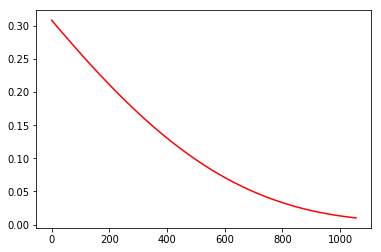

In [78]:
plt.plot(arr_cost,'r')
plt.show()

In [79]:
"""Dự đoán điểm với dữ liệu (8,5)"""
X=np.array([[8,5]])
y=NN.forward(X)
print(y)

[[0.72477415]]
